In [1]:
import rasterio
import numpy as np
import geopandas
import rioxarray as rio
import xarray as xr
from shapely.geometry import mapping
import matplotlib.pyplot as plt
import numpy.ma as ma

In [2]:
dataset=xr.open_dataset("C:/Users/User/Documents/ecmwf/provaitaliaecmwf.nc")
dataset

<xarray.Dataset>
Dimensions:    (longitude: 17, latitude: 18, time: 31)
Coordinates:
  * longitude  (longitude) float32 7.0 7.75 8.5 9.25 ... 16.75 17.5 18.25 19.0
  * latitude   (latitude) float32 47.75 47.0 46.25 45.5 ... 36.5 35.75 35.0
  * time       (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-01-31
Data variables:
    tcco       (time, latitude, longitude) float32 ...
    tc_ch4     (time, latitude, longitude) float32 ...
    tcno2      (time, latitude, longitude) float32 ...
    gtco3      (time, latitude, longitude) float32 ...
    tcwv       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-05-11 08:02:41 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

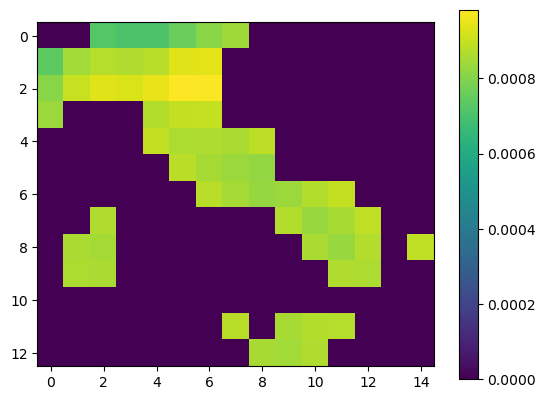

In [3]:
datarray_CO=dataset.tcco
shapefile = geopandas.read_file('C:/Users/User/Documents/ecmwf/italy.shp', crs="epsg:4326")
datarray_CO.rio.write_crs("epsg:4326", inplace=True)
clipped = datarray_CO.rio.clip(shapefile.geometry.apply(mapping), shapefile.crs, drop=True)

monthly_CO_Italy = (clipped.resample(time="1MS", restore_coord_dims=True).sum(dim='time'))/30
plt.imshow(monthly_CO_Italy[0])
plt.colorbar()

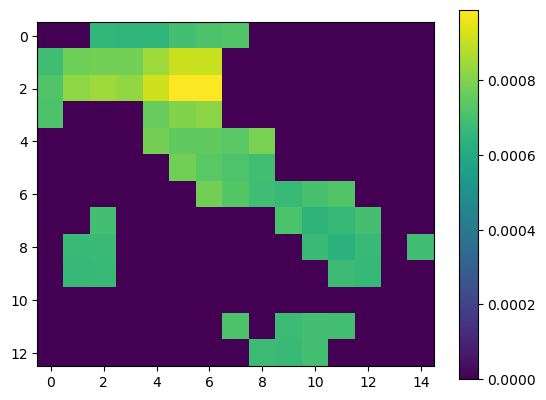

In [4]:
daily_CO_Italy = (clipped.resample(time="1D", restore_coord_dims=True).sum(dim='time'))
plt.imshow(daily_CO_Italy[0])
plt.colorbar()

In [5]:
daily_CO_Italy.shape

(31, 13, 15)

In [6]:
daily_CO_Italy=np.array(daily_CO_Italy)
italia=daily_CO_Italy[daily_CO_Italy!=0].size
vector=np.empty([31,1])
j=0
while j<31 :
    m=daily_CO_Italy[j]
    vector[j]=sum(sum(m))/italia
    j=j+1
#np.savetxt("media_daily_italia_CO.csv", vector, delimiter=";")


In [7]:
datarray_O3=dataset.gtco3
shapefile = geopandas.read_file('C:/Users/User/Documents/ecmwf/italy.shp', crs="epsg:4326")
datarray_O3.rio.write_crs("epsg:4326", inplace=True)
clipped = datarray_O3.rio.clip(shapefile.geometry.apply(mapping), shapefile.crs, drop=True)

daily_O3_Italy = (clipped.resample(time="1D", restore_coord_dims=True).sum(dim='time'))
daily_O3_Italy=np.array(daily_O3_Italy)
italia=daily_O3_Italy[daily_O3_Italy!=0].size
vector_O3=np.empty([31,1])
j=0
while j<31 :
    m=daily_O3_Italy[j]
    vector_O3[j]=sum(sum(m))/italia
    j=j+1

In [8]:
datarray_NO2=dataset.tcno2
shapefile = geopandas.read_file('C:/Users/User/Documents/ecmwf/italy.shp', crs="epsg:4326")
datarray_NO2.rio.write_crs("epsg:4326", inplace=True)
clipped = datarray_NO2.rio.clip(shapefile.geometry.apply(mapping), shapefile.crs, drop=True)

daily_NO2_Italy = (clipped.resample(time="1D", restore_coord_dims=True).sum(dim='time'))
daily_NO2_Italy=np.array(daily_NO2_Italy)
italia=daily_NO2_Italy[daily_NO2_Italy!=0].size
vector_NO2=np.empty([31,1])
j=0
while j<31 :
    m=daily_NO2_Italy[j]
    vector_NO2[j]=sum(sum(m))/italia
    j=j+1

In [9]:
time=np.arange(0,31,1)

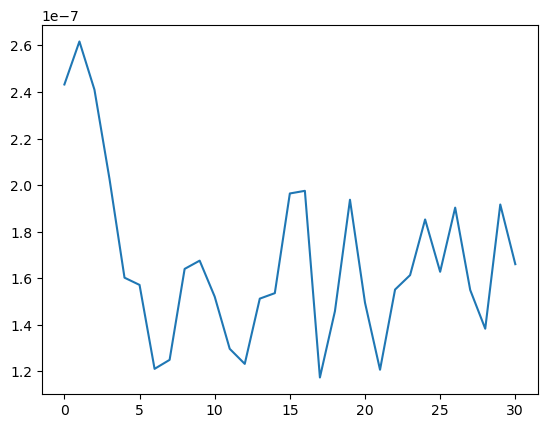

In [10]:
plt.plot(time,vector_NO2)

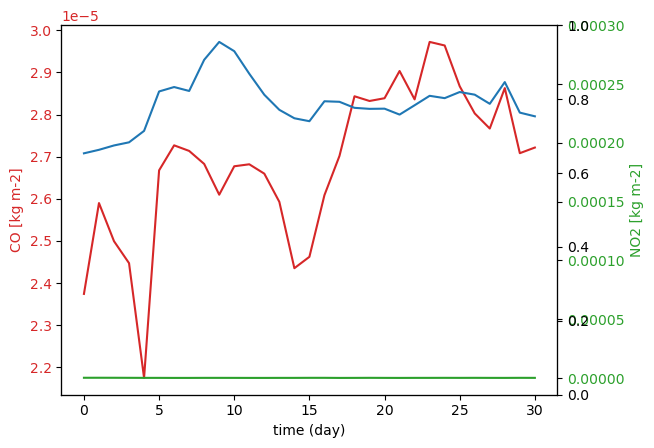

In [11]:
# Create some mock data
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (day)')
ax1.set_ylabel('CO [kg m-2]', color=color)
ax1.plot(time, vector, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('O3 [kg m-2]', color=color)  # we already handled the x-label with ax1
ax2.plot(time, vector_O3, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('NO2 [kg m-2]', color=color)  # we already handled the x-label with ax1
ax2.plot(time, vector_NO2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

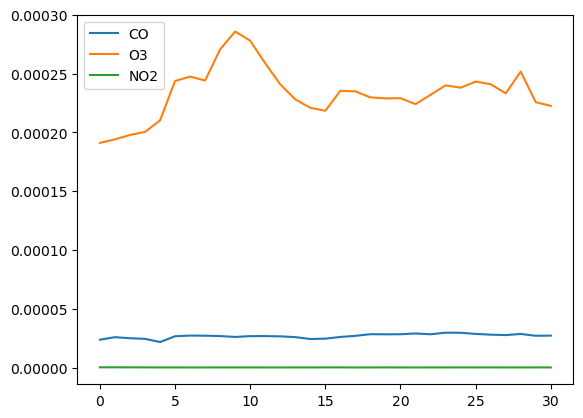

In [12]:
plt.plot(time, vector, label = "CO")
plt.plot(time, vector_O3, label = "O3")
plt.plot(time, vector_NO2, label = "NO2")
plt.legend()
plt.show()

In [13]:
datarray_O3=dataset.gtco3
daily_O3_Italy = (datarray_O3.resample(time="1D", restore_coord_dims=True).sum(dim='time'))
daily_O3_Italy=np.array(daily_O3_Italy)
daily_O3_Italy.shape
j=0
i=0
while j<31 :
    m=daily_O3_Italy[j]
    while i<18:
        vector[j,i]=sum(sum(daily_O3_Italy[j]))

KeyboardInterrupt: 

In [ ]:
datarray_O3=dataset.gtco3
daily_O3_Italy = (datarray_O3.resample(time="1D", restore_coord_dims=True).sum(dim='time'))
daily_O3_Italy=np.array(daily_O3_Italy)
italia=daily_O3_Italy[daily_O3_Italy!=0].size


i=0 
j=0 
d=0 
col=daily_O3_Italy.shape[2] 
row=daily_O3_Italy.shape[1] 
numday=daily_O3_Italy.shape[0] 
dim=(row, numday) 
output=np.empty(dim)*0

In [ ]:
sum(sum(daily_O3_Italy[0,0,:])

In [16]:
datarray_O3=dataset.gtco3
daily_O3_Italy = (datarray_O3.resample(time="1D", restore_coord_dims=True).sum(dim='time'))
daily_O3_Italy=np.array(daily_O3_Italy)
italia=daily_O3_Italy[daily_O3_Italy!=0].size


i=0
d=0 
col=daily_O3_Italy.shape[2] 
row=daily_O3_Italy.shape[1] 
numday=daily_O3_Italy.shape[0] 
dim=(row, numday) 
output=np.empty(dim)*0

for d in range (0,numday,1): 
    for i in range (row):
        j=0
        for j in range (col): 
            output[i,d]=output[i,d]+daily_O3_Italy[d,i,j]
            j=j+1
        i=i+1
    d=d+1
    

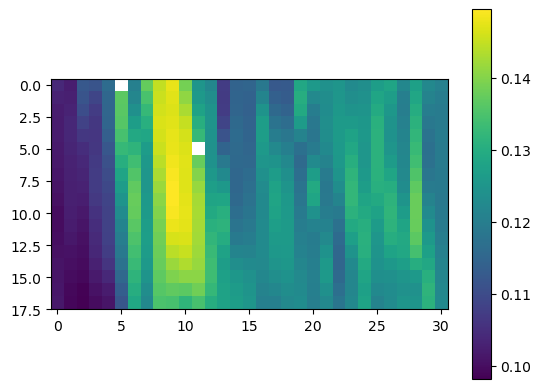

In [17]:
plt.imshow(output)
plt.colorbar()

In [ ]:
i=0 
j=0 
d=0 
col=day.shape[2] 
row=day.shape[1] 
numday=day.shape[0] 
dim=(row,col) 
output=np.empty(dim)*0 
 
range_day_prova=(0,5) 
for i in range (row-1): 
    for j in range (col-1): 
        cont=0 
        for d in range (365,numday-1,1): 
            piove=0 
            if day[d,i,j]>0.0001: 
                piove=1 
             
            if piove==1: 
                cont=cont+1 
            else: 
                if cont>output[i,j]: 
                    output[i,j]=cont 
                cont=0 
             